In [3]:
#coding:utf-8
import pandas as pd
import matplotlib.colors as mcolors
data = pd.read_excel("1999-2019 WIND 项目融资行业.xls.xlsx")

In [4]:
dc = data.iloc[1:12, 1:22]
vals = dc.values.T
dc

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999
1,5,15,12,17,16,9,4,8,14,27,...,13,33,17,15,19,8,6,10,9,8
2,125,309,267,445,392,225,57,66,65,79,...,26,36,28,16,15,11,5,5,5,6
3,480,868,652,738,542,359,148,156,145,225,...,89,86,45,21,25,27,25,33,22,5
4,52,138,166,234,214,152,77,143,219,221,...,111,110,45,28,29,17,7,22,17,2
5,158,380,441,671,666,397,191,271,405,402,...,169,145,66,37,37,30,24,30,29,12
6,2576,4053,3928,4131,3853,2214,1072,668,748,655,...,287,310,241,146,127,88,80,79,79,47
7,20,65,31,43,39,33,24,14,18,27,...,23,19,17,5,4,1,1,3,0,3
8,112,120,94,166,196,117,61,87,92,130,...,46,53,25,10,9,10,9,11,5,3
9,35,36,59,46,40,30,19,26,19,30,...,8,4,5,2,2,2,3,2,0,1
10,5,19,19,30,20,24,14,24,22,43,...,35,26,14,4,6,4,4,4,3,1


In [6]:
labels = data.iloc[1:23, :1]
xlabels=labels.values.flatten().tolist()
xlabels
colors = ['teal','red','blue','golden','green','cyan','pink','purple','orange', 'magenta', 'violet', 'lime', 'olive', 'salmon','goldenrod','fuchsia', 'orchid', 'plum']

lcmap = dict(zip(xlabels, colors[:len(xlabels)]))

In [4]:
vals.tolist()
xlabels

['电信服务',
 '金融',
 '医疗保健',
 '材料',
 '工业',
 '信息技术',
 '房地产',
 '日常消费',
 '公用事业',
 '能源',
 '可选消费',
 '电信服务',
 '金融',
 '医疗保健',
 '材料',
 '工业',
 '信息技术',
 '房地产',
 '日常消费',
 '公用事业',
 '能源',
 '可选消费']

In [111]:
nodes = vals.tolist()

def to_node( data):
    node = {"xlabel": "电信业",
       "value": 111,
       "color": 'red',
       "xindex": 0,
       "xindex_interpolated":0.5}
    # 把字符串翻译成数字
    data_translated = list((map(lambda x: int(x), data)))
    
    # 每个数字打上行业标签, 元组(行业, 行业值)
    pairs = list(zip(xlabels,data_translated))
    
    # 通过行业值排序
    pairs_sorted = sorted(pairs, key=lambda x:x[1], reverse=True)
    
#     print(pairs_sorted)
    nodes = []
    idx=0
    for p in pairs_sorted:
#         print(p)
        node = {"xlabel": p[0],
               "value": p[1],
               "xindex": idx,
                "year": 1999 + i,
                "xindex_interpolated": idx, 
               "color": lcmap[p[0]]}
        nodes.append(node)
        idx+=1
    return nodes

nodes = list(map(to_node, vals.tolist()))[::-1]

# 打上年份标签
year = 1999
for y in nodes:
    for n in y:
        n["year"]=year
    year+=1

In [107]:
len(nodes)

21

In [8]:


num_of_interpolated_nodes = 6 # 均值插入6个点
nodes_interpolated = []
prev_values = {}

# 遍历excel的每一年
for row in nodes:
    interpolated_rows = [[] for i in range( num_of_interpolated_nodes)]
    
    print(list(map(lambda x: x["value"], row)))
    # 遍历excel的每一行业
    for node in row:
        label = node["xlabel"]
        if label not in prev_values:
            prev_values[label] = node
            print(node)
            continue
        
        # 均匀插入num_of_interpolated_nodes个点
        for i in range( num_of_interpolated_nodes):
            # copy a new node
            pnode = prev_values[label]
            nnode = node.copy()
            nnode["xindex_interpolated"] = pnode["xindex"]*(num_of_interpolated_nodes -i-1)/num_of_interpolated_nodes + nnode["xindex"]*(i+1)/num_of_interpolated_nodes
            pvalue = pnode["value"]
            cvalue = node["value"]
            nnode["value"] = int(pvalue + (cvalue - pvalue)*(i+1)/(num_of_interpolated_nodes + 1))
#             print("====={}. pvalue: {},cvalue: {},nvalue: {}".format(i, pvalue, cvalue, nnode["value"]))
            interpolated_rows[i].append(nnode)
            
#             print(interpolated_rows)
#             print("*"*10)
#         print(list(map(lambda x: x["value"],node)))
        prev_values[label] = node
    
    for r in interpolated_rows:
        print("*** %s" % list(map(lambda x: x["value"], r)))
        
    if not nodes_interpolated:
        nodes_interpolated.append(row)
    else:
        nodes_interpolated.extend(interpolated_rows)
        nodes_interpolated.append(row)
#         print(prev_values)
#         print("-"*10)
#         print(interpolated_row)
#         print(row)
#         print("*"*10)

len(nodes), len(nodes_interpolated)

NameError: name 'nodes' is not defined

MovieWriter stderr:
convert: unexpected end-of-file '-': No such file or directory @ error/rgb.c/ReadRGBImage/245.
convert: no images defined `perceptron22.mp4' @ error/convert.c/ConvertImageCommand/3288.



CalledProcessError: Command '['convert', '-size', '1440x864', '-depth', '8', '-delay', '16.666666666666668', '-loop', '0', 'rgba:-', 'perceptron22.mp4']' returned non-zero exit status 1.

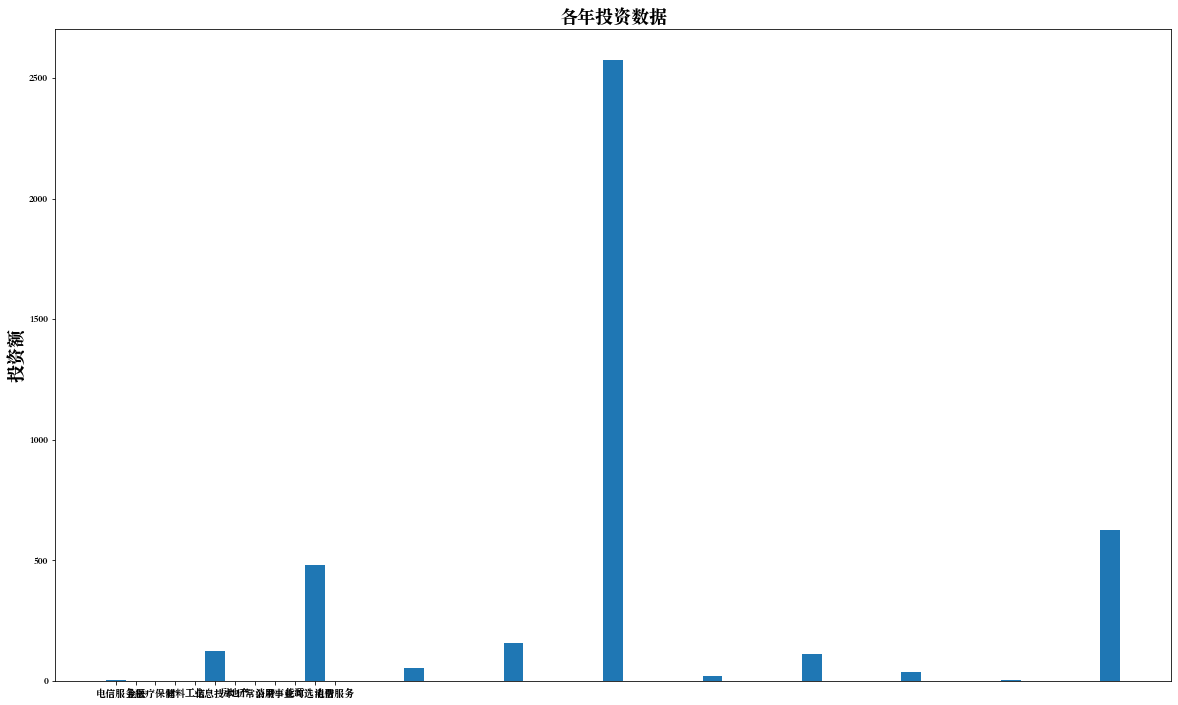

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import copy
from matplotlib import font_manager

fname = ['Songti SC'][0]
plt.rcParams['font.family']=[fname]
plt.rcParams['axes.unicode_minus']=False

fontP = font_manager.FontProperties()
fontP.set_family(fname)
fontP.set_size(18)

fontTitle = font_manager.FontProperties()
fontTitle.set_family(fname)
fontTitle.set_size(18)


results = vals.tolist()


# 设置初始值并执行算法
start = list(map(lambda x: int(x),list(vals[0])))
s = start
l = len(s)

left = list(map(lambda x: x * 5,range(l)))

# 画图开始
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111) 
# 柱状图关键在于这句话
rects = plt.bar(left, height=(start), width=1, align="center", yerr=0.000001)
# 柱状图加入下标
plt.xticks(left, xlabels)

# 下标
ax.set_ylabel(u'投资额', fontproperties=fontP)
ax.set_title(u'各年投资数据', fontproperties=fontP)
ax.set_xticks(range(l+1))
ax.set_xticklabels(xlabels)
# ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                   size=15)
        
max_y = 4500
min_y = 0
#如果是参数是list,则默认每次取list中的一个元素,results[0],results[1],...  
def update(data):
#     print(data)
    # 将上一次的柱状图清空
    plt.cla()
    
    # 下标
    ax.set_ylabel(u'投资额', fontproperties=fontP)
    ax.set_title(u'各年投资数据{}'.format(data[0]["year"]), fontproperties=fontTitle)
#     ax.set_xticks(range(l))
#     ax.set_xticklabels(xlabels)
    # 按值大小排序
#     data_translated = list((map(lambda x: int(x), data)))
#     pairs = list(zip(xlabels,data_translated))
#     pairs_sorted = sorted(pairs, key=lambda x:x[1], reverse=True)
    
#     lbls = list(map(lambda x:x[0], pairs_sorted))
    hght = list(map(lambda x: x["value"], data))
#     print(hght)
    x_interpolated = list(map(lambda x: x["xindex_interpolated"], data))
    x = list(map(lambda x: x["xindex"], data))
    print(x,hght)
    rects = plt.bar(x=x, height=hght, width=0.4, align="center", yerr=0.000001, color=list(map(lambda x: x["color"], data)), label=data[0]["year"])
    autolabel(rects)
    plt.xticks(x, list(map(lambda x: x["xlabel"], data)), fontproperties=fontP)
    plt.ylim(bottom=0)
    return rects

# 生成动态图的关键语句  
ani = animation.FuncAnimation(fig, update, nodes_interpolated, interval=500)  

# 利用ImageMagick导出
# ani.save('perceptron22.gif', fps=2, writer='imagemagick')
ani.save('perceptron22.mp4', fps=6, writer='imagemagick')

In [98]:
nodes_interpolated

[[{'color': 'orchid',
   'value': 47,
   'xindex': 0,
   'xindex_interpolated': 0,
   'xlabel': '信息技术',
   'year': 1999},
  {'color': 'fuchsia',
   'value': 12,
   'xindex': 1,
   'xindex_interpolated': 1,
   'xlabel': '工业',
   'year': 2000},
  {'color': 'violet',
   'value': 11,
   'xindex': 2,
   'xindex_interpolated': 2,
   'xlabel': '可选消费',
   'year': 2001},
  {'color': 'lime',
   'value': 8,
   'xindex': 3,
   'xindex_interpolated': 3,
   'xlabel': '电信服务',
   'year': 2002},
  {'color': 'olive',
   'value': 6,
   'xindex': 4,
   'xindex_interpolated': 4,
   'xlabel': '金融',
   'year': 2003},
  {'color': 'salmon',
   'value': 5,
   'xindex': 5,
   'xindex_interpolated': 5,
   'xlabel': '医疗保健',
   'year': 2004},
  {'color': 'plum',
   'value': 3,
   'xindex': 6,
   'xindex_interpolated': 6,
   'xlabel': '房地产',
   'year': 2005},
  {'color': 'purple',
   'value': 3,
   'xindex': 7,
   'xindex_interpolated': 7,
   'xlabel': '日常消费',
   'year': 2006},
  {'color': 'goldenrod',
   'value': 2

In [20]:
a = list(zip([1,33,5,77,9],[2,4,66,8,10]))
b = sorted(a, key=lambda x: x[1], reverse=True)
a,b

([(1, 2), (33, 4), (5, 66), (77, 8), (9, 10)],
 [(5, 66), (9, 10), (77, 8), (33, 4), (1, 2)])

In [94]:
a = list(map(lambda x: x * 3, range(5)))

[0, 3, 6, 9, 12]

In [6]:
results

[['5',
  '125',
  '480',
  '52',
  '158',
  '2576',
  '20',
  '112',
  '35',
  '5',
  '627',
  '5',
  '125',
  '480',
  '52',
  '158',
  '2576',
  '20',
  '112',
  '35',
  '5',
  '627'],
 ['15',
  '309',
  '868',
  '138',
  '380',
  '4053',
  '65',
  '120',
  '36',
  '19',
  '1210',
  '15',
  '309',
  '868',
  '138',
  '380',
  '4053',
  '65',
  '120',
  '36',
  '19',
  '1210'],
 ['12',
  '267',
  '652',
  '166',
  '441',
  '3928',
  '31',
  '94',
  '59',
  '19',
  '1026',
  '12',
  '267',
  '652',
  '166',
  '441',
  '3928',
  '31',
  '94',
  '59',
  '19',
  '1026'],
 ['17',
  '445',
  '738',
  '234',
  '671',
  '4131',
  '43',
  '166',
  '46',
  '30',
  '1074',
  '17',
  '445',
  '738',
  '234',
  '671',
  '4131',
  '43',
  '166',
  '46',
  '30',
  '1074'],
 ['16',
  '392',
  '542',
  '214',
  '666',
  '3853',
  '39',
  '196',
  '40',
  '20',
  '1022',
  '16',
  '392',
  '542',
  '214',
  '666',
  '3853',
  '39',
  '196',
  '40',
  '20',
  '1022'],
 ['9',
  '225',
  '359',
  '152',
 

In [40]:
1e5

100000.0

In [92]:
u'各年投资数据{}'.format(11)

'各年投资数据11'